<a href="https://colab.research.google.com/github/cennetceylan19/ImageClassificationExamples/blob/main/ImageClassificationProjects-Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification Project With The CIFAR-10 Dataset**
My project topic is Image classification. I have used the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Besides, I have divided training images into training and validation. In this way, I have used 40000 training images, 10000 validation images, and 10000 test images in my project.

You can see the CIFAR-10 in the image below.

There are 10 classes airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.


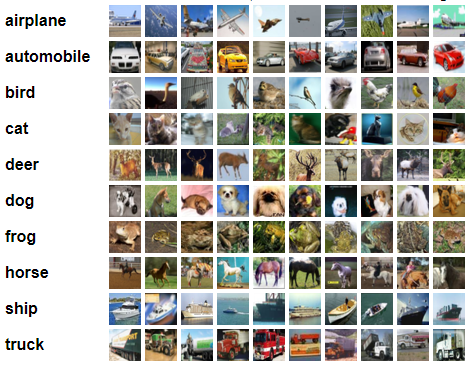


# The Purpose 
**The purpose of this project** is to learn the classification by applying  Convolution Neural Network. Moreover to learn to create the Convolution Neural Network model by using Keras and Tensorflow libraries of Python to solve a multiclass classification problems

# Technique Used 
**Image classification** is based on a **convolutional neural network(CNN)**. Classification is when the data is included in a group that was previously determined. It is a branch of the supervised learning technique. Algorithms predict as fundamental the previously provided label example in supervised learning. This technique is useful in situations where the outcome is known.

We can talk about convolutional neural networks (CNN). The CNN model is a neural network that is used to derive the feature map of the image. As the number of CNN layers increases, it generates more feature maps. The more features on a map, the better the image classification. There are some layers in the CNN structure. When I use these layers, I'll tell you about them. 

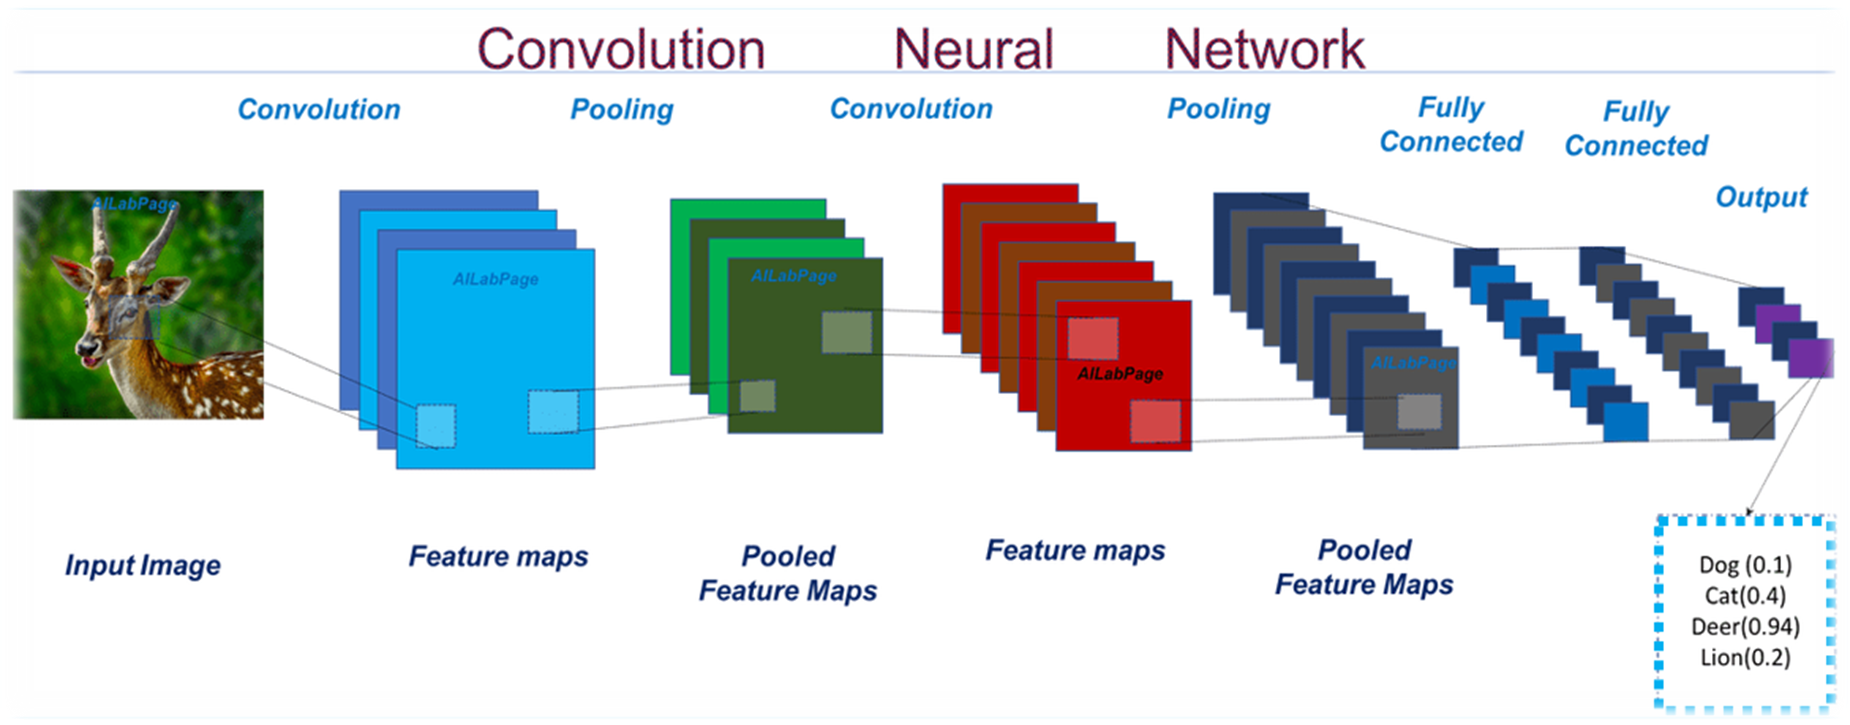

# Importing the required libraries
Firstly, I imported the required libraries.

In [1]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

# Import Numpy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Downloading  the CIFAR-10 dataset
I download the CIFAR-10 dataset which is included in Keras and assign it to the corresponding variables x_train, y_train, x_test, and y_test.

In [2]:
# Download the cifar-10 dataset included in Keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
CLASSES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
50000 train samples
10000 test samples


horse


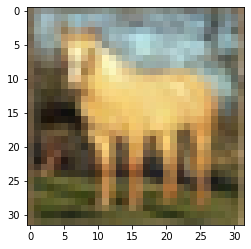

In [5]:
# example training data
index = 575
plt.imshow(X_train[index], vmin=32, vmax=32)
print(CLASSES[int(y_train[index])])

bird


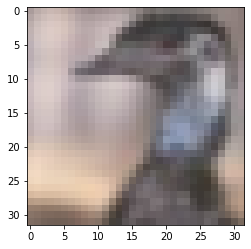

In [6]:
# example test data
index = 135
plt.imshow(X_test[index])
print(CLASSES[int(y_test[index])])

# Preprocessing

I should do preprocessing to obtain the result is better in this stage. Preprocessing contains digital image processing to get better image,and the validation dataset creating by dividing train dataset to avoid overfitting. 

- I do not use to digital image processing in this stage.
- I need three datasets: train, validate, and test. I separated 10000 images from the train dataset, and used it as the validation dataset. 

In [7]:
# Create the validation datasets 
# and assign the last 10000 images of x_train and y_train
X_val = X_train[40000:]
y_val = y_train[40000:]
# Create new train datasets
# and assign the first 40000 images of x_train and y_train
X_train = X_train[:40000]
y_train = y_train[:40000]

In [8]:
# Print the lengths of the each dataset
print(f'x_train: {len(X_train)}')
print(f'x_val: {len(X_val)}')
print(f'x_test: {len(X_test)}')

x_train: 40000
x_val: 10000
x_test: 10000


# Normalization
Since pixel values are between 0 and 255, dividing these values by 255 will scale each of them to values between 0 and 1. 

In [9]:
# Divide each dataset by 255
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

# Constructing the neural network

I will start with create the model.
in this command ı created my model.
I used tf.keras.Sequential() to create a model object

In [10]:
# Create a model object
my_model = tf.keras.Sequential()

Then I will look at feature extraction layers.

# Feature extraction layers
For the first two layers, I add a convolution and max pooling layer.

I use tf.keras.layers.Conv2D() and tf.keras.layers.MaxPooling2D() to create the layers.

I use .add() method of the object to add the layer.

**Convolution Layer**

In the convolution layer, make inferences feature extraction. Used some filters for these inferences. The working structure of filters is a few matrix operations. That is, multiplying the main image matrix by another matrix of our choice. For example, let's put a 5x5 image matrix into a 3x3 filter. When we put the filter matrix on the image matrix, let's put the overlapping cell values ​​into the matrix product and write it in a new matrix. When we do this on the entire image, the resulting matrix is ​​our feature matrix.
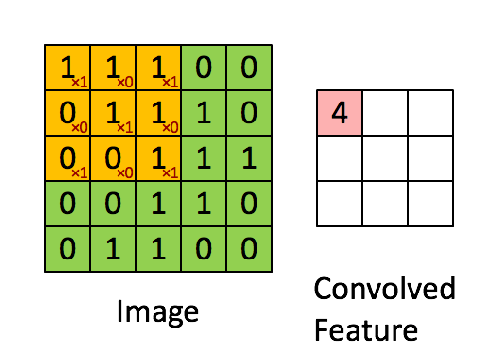
**Pooling Layer**

It reduces the height and width information by keeping the number of channels (RGB or gray) of the image matrix constant. No feature extraction. There are different calculation algorithms such as maximum, average, and L2-norm pooling. The working system is that the image matrix, in which a filter matrix is navigated, creates a new matrix by selecting values according to the algorithm used. I used max pooling.

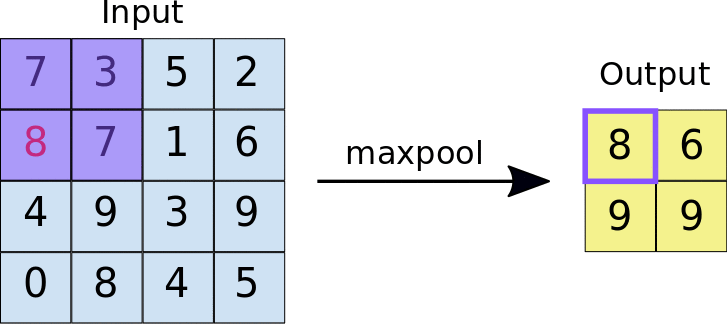

Used other terms;

**The stride** is a parameter that determines how much the filter will be shifted while performing matrix calculation. It directly affects the output size.

**The zero padding** is added after the convolution process to eliminate the size difference between the input matrix and the output matrix. This is achieved by adding extra pixels to the input matrix.

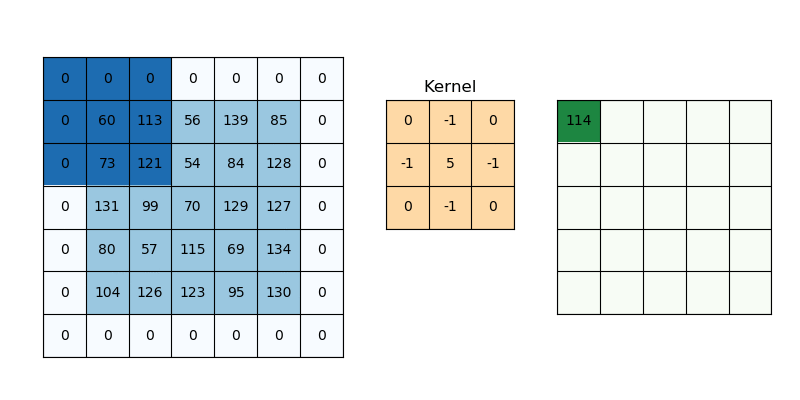

**The formula for Finding Output Matrix:**

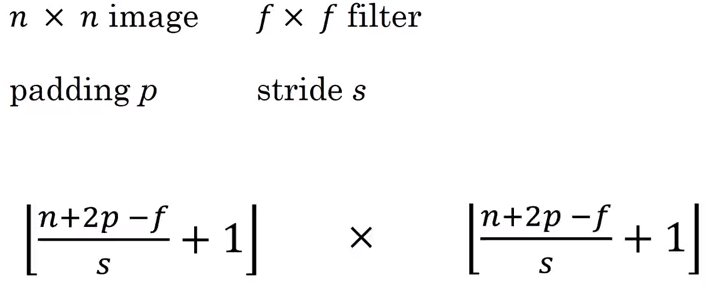


In [11]:
# Add a convolution and max pooling layer
my_model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu',
                                 input_shape=(32,32,3)))
my_model.add(tf.keras.layers.MaxPool2D((2,2)))

Then, I add more layers. 
 I used tf.keras.layers.Conv2D() and tf.keras.layers.MaxPooling2D() to create the layers.

 I used .add() method of the object to add the layer.

In [12]:
# Add more convolution and max pooling layers
my_model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu'))
my_model.add(tf.keras.layers.MaxPool2D((2,2)))
my_model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu'))
my_model.add(tf.keras.layers.MaxPool2D((2,2)))
my_model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu'))
my_model.add(tf.keras.layers.MaxPool2D((2,2)))
my_model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu'))
my_model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu'))

**Flatten Layer**

To connect the 2D convolution and 1D dense layers, we have to "flatten" the convolution layer.

I used tf.keras.layers.Flatten() to flatten the layers.

I used .add() method of the object to add the layer.

The task of this layer is to prepare the data to be sent to the Fully Connected Layer. The process done is to convert the matrices from the convolutional pooling layer into a one-dimensional matrix.
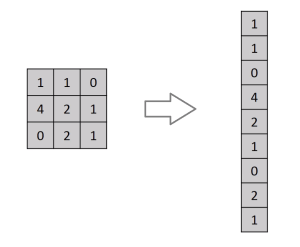


In [13]:
# Flatten the convolution layer
my_model.add(tf.keras.layers.Flatten())

**Classification layers**

Now that I have the features extracted, I can move on to the classification part. I added two dense layers each with 128 nodes, 0.5 dropout and ReLU activation functions.

I used tf.keras.layers.Dense() to create the layers.

I used .add() method of the object to add the layer.


In [14]:
# Add the dense layer and dropout layer
my_model.add(tf.keras.layers.Dense(128, activation='relu'))
my_model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
my_model.add(tf.keras.layers.Dense(128, activation='relu'))
my_model.add(tf.keras.layers.Dropout(0.5))

**Output layer**

As the last part of our neural network, we add the output layer. The number of nodes will be equal to the number of target classes which is 10 in our case. We'll use the softmax activation function in the output layer.

We use tf.keras.layers.Dense() to create the layer.

We use .add() method of the object to add the layer

In [15]:
# Add the output layer
my_model.add(tf.keras.layers.Dense(10, activation='softmax'))

ReLU Function: Rectified linear unit (RELU) is a nonlinear function. The ReLU function takes the value 0 for negative inputs, while x takes the value x for positive inputs.

Softmax Function: This function, which is used for multiple classification problems, produces outputs between [0,1] showing the probability that each given input belongs to a class.

**Optimizer**

 To configure the model for training, I used the .compile() method. Inside the compile method,  

**A loss function**: to measure how good the network is

**An optimizer:** to update network as it sees more data and reduce loss value

**Metrics:** to monitor performance of network


"Adam" for optimizer

"Sparse Categorical Crossentropy" for the loss function

We construct the model with the .compile() method.

In [16]:
from tensorflow.python import metrics
# Compile the model
my_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

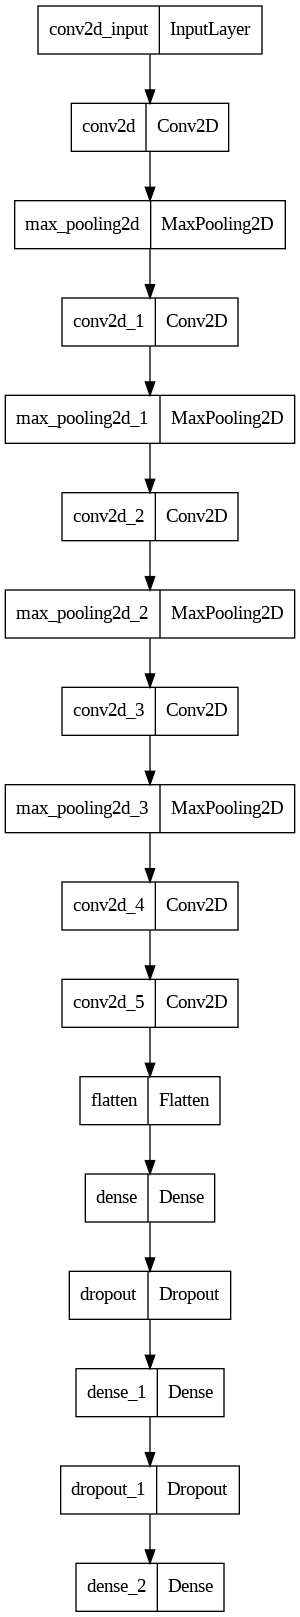

In [18]:
from keras.utils import plot_model
plot_model(my_model)

**Training the model**

I would like to continue with training the my model.

The batch size is a number of samples processed before the model is updated.

The number of epochs is the number of complete passes through the training dataset.

I used .fit() to train the model.

In [19]:
# Train the model for 25 epochs with batch size of 128
results = my_model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=25,
                    validation_data=(X_val,y_val))

Epoch 1/25
625/625 [==============================] - 13s 6ms/step - loss: 1.9229 - accuracy: 0.2599 - val_loss: 1.5642 - val_accuracy: 0.3976
Epoch 2/25
625/625 [==============================] - 3s 5ms/step - loss: 1.4636 - accuracy: 0.4610 - val_loss: 1.2560 - val_accuracy: 0.5423
Epoch 3/25
625/625 [==============================] - 4s 6ms/step - loss: 1.2587 - accuracy: 0.5555 - val_loss: 1.1477 - val_accuracy: 0.5938
Epoch 4/25
625/625 [==============================] - 3s 5ms/step - loss: 1.1187 - accuracy: 0.6117 - val_loss: 1.0531 - val_accuracy: 0.6344
Epoch 5/25
625/625 [==============================] - 4s 6ms/step - loss: 1.0072 - accuracy: 0.6563 - val_loss: 0.9630 - val_accuracy: 0.6668
Epoch 6/25
625/625 [==============================] - 3s 5ms/step - loss: 0.9149 - accuracy: 0.6905 - val_loss: 0.9534 - val_accuracy: 0.6753
Epoch 7/25
625/625 [==============================] - 4s 6ms/step - loss: 0.8448 - accuracy: 0.7159 - val_loss: 0.9116 - val_accuracy: 0.6888
Epoch

**Visualize the results**

After the model is trained, I can create a graph to visualize the change of loss over time. Results are held in:

results.history["loss"]

results.history["val_loss"]

We use plt.show() to display the graph.

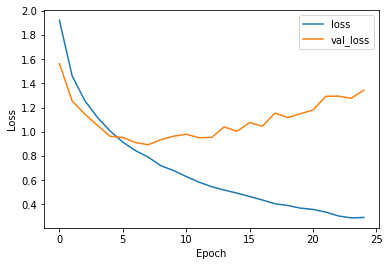

In [20]:
# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()


in the above function, have been showed loss and val_loss values on graph. what is meant here As Loss value reduce with time val_loss firstly reduces later begin increases. This is an undesirable situation. My model is in overfitting state so test evalation is not good.

I have done early stopping and convolution layer increase to prevent overfitting. I have acquired better result.

In [21]:
# Create a new model object
my_model_rw = tf.keras.Sequential()

In [22]:
# Add a convolution and max pooling layer
my_model_rw.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu',
                                 input_shape=(32,32,3)))
my_model_rw.add(tf.keras.layers.MaxPool2D((2,2)))

In [23]:
# Add more convolution and max pooling layers
my_model_rw.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu'))
my_model_rw.add(tf.keras.layers.MaxPool2D((2,2)))
my_model_rw.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu'))
my_model_rw.add(tf.keras.layers.MaxPool2D((2,2)))
my_model_rw.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu'))
my_model_rw.add(tf.keras.layers.MaxPool2D((2,2)))
my_model_rw.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu'))
my_model_rw.add(tf.keras.layers.Conv2D(256,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu'))
my_model_rw.add(tf.keras.layers.MaxPool2D((2,2)))

In [24]:
# Flatten the convolution layer
my_model_rw.add(tf.keras.layers.Flatten())

In [25]:
# Add the dense layer and dropout layer
my_model_rw.add(tf.keras.layers.Dense(128, activation='relu'))
my_model_rw.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
my_model_rw.add(tf.keras.layers.Dense(64, activation='relu'))
my_model_rw.add(tf.keras.layers.Dropout(0.5))

In [26]:
# Add the output layer
my_model_rw.add(tf.keras.layers.Dense(10, activation='softmax'))

In [27]:
from tensorflow.python import metrics
# Compile the model
my_model_rw.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
my_model_rw.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 64)        

In [29]:
# Train the model for 25 epochs with batch size of 128
results = my_model_rw.fit(X_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(X_val,y_val))

Epoch 1/10
313/313 [==============================] - 4s 10ms/step - loss: 2.0419 - accuracy: 0.2108 - val_loss: 1.6611 - val_accuracy: 0.3534
Epoch 2/10
313/313 [==============================] - 3s 9ms/step - loss: 1.6175 - accuracy: 0.3858 - val_loss: 1.4041 - val_accuracy: 0.4771
Epoch 3/10
313/313 [==============================] - 3s 9ms/step - loss: 1.4068 - accuracy: 0.4945 - val_loss: 1.2437 - val_accuracy: 0.5475
Epoch 4/10
313/313 [==============================] - 3s 9ms/step - loss: 1.2568 - accuracy: 0.5597 - val_loss: 1.1123 - val_accuracy: 0.6047
Epoch 5/10
313/313 [==============================] - 3s 9ms/step - loss: 1.1459 - accuracy: 0.6031 - val_loss: 1.0740 - val_accuracy: 0.6249
Epoch 6/10
313/313 [==============================] - 3s 9ms/step - loss: 1.0478 - accuracy: 0.6425 - val_loss: 1.0016 - val_accuracy: 0.6534
Epoch 7/10
313/313 [==============================] - 3s 9ms/step - loss: 0.9740 - accuracy: 0.6723 - val_loss: 0.9786 - val_accuracy: 0.6682
Epoch

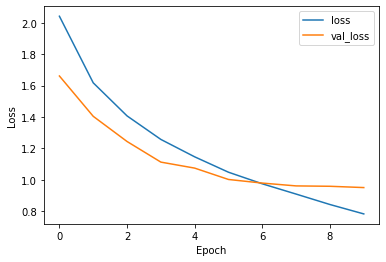

In [30]:
# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

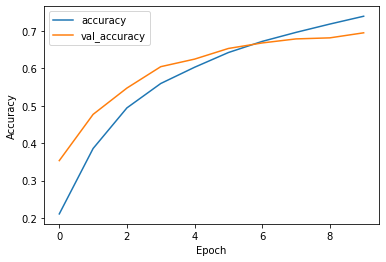

In [31]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [32]:
# Evaluate the performance
my_model_rw.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9798 - accuracy: 0.6851


[0.9798320531845093, 0.6851000189781189]

**Try a prediction**

Next, we take the sample we selected at the beginning and make a prediction on it.

We reshape the image to (1,32,32,3)

We use the .prediction() method of the model object

In [33]:
# Make prediction on the reshaped sample
prediction_result = my_model_rw.predict(X_test[1516].reshape(1,32,32,3))

# Print the prediction result
prediction_result

1/1 [==============================] - 0s 234ms/step


array([[0.2986188 , 0.00105848, 0.269033  , 0.02235499, 0.32807034,
        0.01135299, 0.02649326, 0.0137983 , 0.02181378, 0.00740595]],
      dtype=float32)

Finally, we find the predicted class and prediction probability and print the results.

We use .argmax() to find the class.

We use .max() to find the probability.

In [34]:
# Find the predicted class
predicted_class=prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [35]:
# Print the results
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %")

This image belongs to class 4 with 0.32807034254074097 probability %


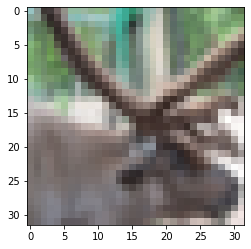

In [36]:
plt.imshow(X_test[1516])

In [37]:
print(CLASSES[predicted_class])

deer
